**Nesse Exercicio vamos comparar o uso de Arvore de Decisão com Random Forest**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Exercício


Realize uma classificação usando o classificador de arvore de decisão, o dataset do titanic para prever se a pessoa sobreviveu ou não. Imprima a matriz de confusão e verifique se se modelo possui uma boa acurácia e precisão. Em seguida compare com os resultados com uma random forest

## Etapas:

1 - Carregue a base

2 - Explore os dados, verifique se precisam de algum tratamento

3 - Verifique a necessidade de escalonamento

4 - Crie um pipeline e adicione o escalonamento (se necessário) e o estimador

5 - Faça o fit do modelo e verifique as métricas

6 - Replique para os demais estimadores

In [44]:
titanic = sns.load_dataset('titanic')

In [45]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


***Aqui vamos começar a limpeza e organização de dados***

In [46]:
titanic['alive'].value_counts(normalize=True)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

In [47]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [48]:
#Transformando para binario : 
titanic.loc[titanic['sex']=='female','sex'] = 0
titanic.loc[titanic['sex']=='male','sex'] = 1
titanic.loc[titanic['alone']== False,'alone'] = 0
titanic.loc[titanic['alone']== True,'alone'] = 1
titanic.loc[titanic['adult_male']==False,'adult_male'] = 0
titanic.loc[titanic['adult_male']==True,'adult_male'] = 1


In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), int64(4), object(7)
memory usage: 92.8+ KB


In [50]:
titanic = titanic.drop(columns='deck') #droparemos a coluna deck por ter muitos valores nulos

In [51]:
titanic = titanic.dropna(axis = 0) # aqui dropamos o resto dos nulos

In [56]:
titanic.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alive,alone,pclass_2,pclass_3,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,1,22.0,1,0,7.2500,1,no,0,0,1,0,1,0,1,1,0,0,1
1,1,0,38.0,1,0,71.2833,0,yes,0,0,0,0,0,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,yes,1,0,1,0,1,0,1,0,1,0,1
3,1,0,35.0,1,0,53.1000,0,yes,0,0,0,0,1,0,0,0,1,0,1
4,0,1,35.0,0,0,8.0500,1,no,1,0,1,0,1,0,1,1,0,0,1


In [55]:
titanic = pd.get_dummies(titanic,columns=['pclass'],drop_first=True)
titanic = pd.get_dummies(titanic,columns=['embarked'],drop_first=True)
titanic = pd.get_dummies(titanic,columns=['class'],drop_first=True)
titanic = pd.get_dummies(titanic,columns=['who'],drop_first=True)
titanic = pd.get_dummies(titanic,columns=['embark_town'],drop_first=True)

In [54]:
titanic['embark_town'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64

In [59]:
X = titanic.drop(columns='alive', axis = 1)

y = titanic['alive']

X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y)

In [ ]:
############### ARVORE DE DECISAO #####################

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler



In [70]:
pipe = Pipeline([("std_scaler", StandardScaler()),("dtc",DecisionTreeClassifier(random_state=42))])

params_grid_dtc = {"dtc__criterion" : ["gini", "entropy", "log_loss"],
                  "dtc__splitter" : ["best", "random"],
                  "dtc__max_depth" : range(3, 7),
                  "dtc__min_samples_leaf" : range(2,6)}   

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_dtc = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dtc,
                       scoring="accuracy",
                       cv=splitter,
                       verbose=0)

grid_dtc.fit(X_train, y_train)                       


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('dtc',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dtc__criterion': ['gini', 'entropy', 'log_loss'],
                         'dtc__max_depth': range(3, 7),
                         'dtc__min_samples_leaf': range(2, 6),
                         'dtc__splitter': ['best', 'random']},
             scoring='accuracy')

In [71]:
grid_dtc.best_params_

{'dtc__criterion': 'gini',
 'dtc__max_depth': 3,
 'dtc__min_samples_leaf': 2,
 'dtc__splitter': 'best'}

[[85  0]
 [ 0 58]]


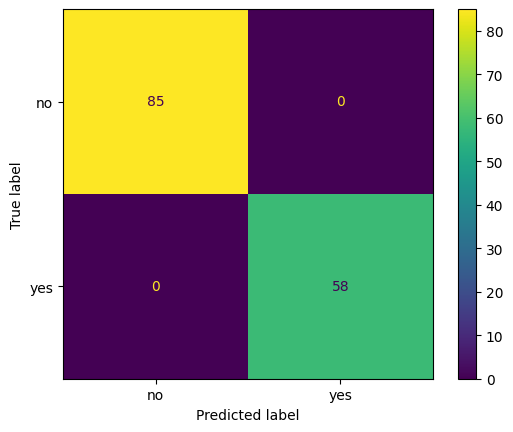

In [73]:
y_pred_test = grid_dtc.predict(X_teste)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

In [77]:
print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

          no       1.00      1.00      1.00        85
         yes       1.00      1.00      1.00        58

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



**Como observado acima o modelo overfitou**

In [ ]:
########## Agora vamos fazer por Random Tree ##########

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,make_scorer,accuracy_score,f1_score


In [83]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=3, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas)


splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score,pos_label ='Yes')

param_grid = {"rf__n_estimators" : range(150, 200,10),
              "rf__max_depth" : range(3, 8),
              "rf__max_features" : range(1, 3)}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)


In [85]:
grid_rf.fit(X_train, y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10; 1/50] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150.
[CV 1/10; 1/50] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 2/10; 1/50] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150.
[CV 2/10; 1/50] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 3/10; 1/50] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150.
[CV 3/10; 1/50] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.2s
[CV 4/10; 1/50] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150.
[CV 4/10; 1/50] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 5/10; 1/50] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150.
[CV 5/10; 1/50] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(max_depth=5,
                                                               n_estimators=3,
                                                               n_jobs=-1,
                                                               random_state=42))]),
             param_grid={'rf__max_depth': range(3, 8),
                         'rf__max_features': range(1, 3),
                         'rf__n_estimators': range(150, 200, 10)},
             scoring=make_scorer(recall_score, pos_label=Yes), verbose=10)

In [86]:
y_pred = grid_rf.predict(X_teste)


[[84  1]
 [12 46]]


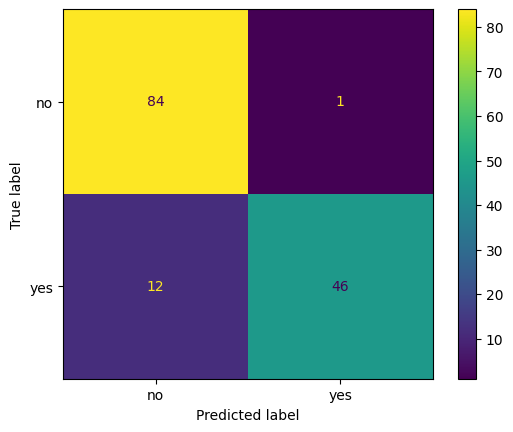

In [91]:

print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [90]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          no       0.88      0.99      0.93        85
         yes       0.98      0.79      0.88        58

    accuracy                           0.91       143
   macro avg       0.93      0.89      0.90       143
weighted avg       0.92      0.91      0.91       143



**Como vemos acima o modelo com Random Forrest não overfita**